# Lesson 7: Method of Images

In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
xstart,xend,ystart,yend,N = -2.0,2.0,-1.0,1.0,50
x,y = numpy.linspace(xstart,xend,N),numpy.linspace(ystart,yend,N)
X,Y = numpy.meshgrid(x,y)

## Creating a class for a source

In [3]:
class Source:
    """
    Contains information pertaining to a Source or a Sink
    """
    def __init__(self,strength,x,y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the singularity.
        x: float
            x-coordinate of the singularity.
        y: float
            y-coordinate of the singularity.
        """
        self.strength = strength
        self.x,self.y = x,y
    
    def velocity(self,X,Y):
        """
        Computes the velocity field generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def stream_function(self,X,Y):
        """
        Computes the stream-function generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y),(X-self.x))

Defining the source using class created

In [4]:
#source
strength_source = 1.0           # strength of the source/sink
x_source,y_source = 0.0,0.5     # location of the source/sink

#create a source
source = Source(strength_source,x_source,y_source)

#compute the velocity and streamfunction
source.velocity(X,Y)
source.stream_function(X,Y)

In [5]:
# creating image of source
source_image = Source(strength_source,x_source,-y_source)
source_image.velocity(X,Y)
source_image.stream_function(X,Y)

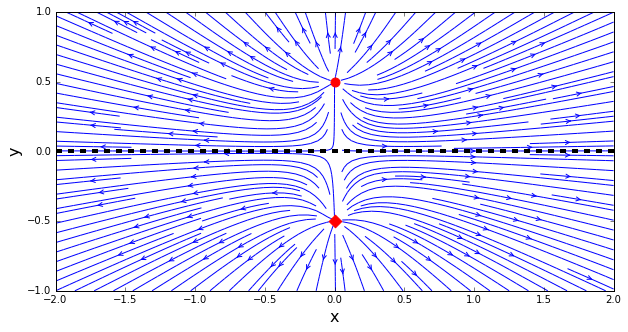

In [6]:
#superposition
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

#plot the streamlines
size = 10
pyplot.figure(figsize=(size,(yend-ystart)/(xend-xstart)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(xstart,xend)
pyplot.ylim(ystart,yend)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(source.x,source.y,color = 'red',s = 80,marker = 'o')
pyplot.scatter(source_image.x,source_image.y,color = 'red',s = 80, marker = 'D')
pyplot.axhline(0.,color='k',linestyle='--',linewidth=4)

## Vortex near a plane wall

In [7]:
class Vortex:
    """
    Contains information pertaining to a vortex.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the vortex.
        
        Parameters
        ----------
        strength: float
            Strength of the vortex.
        x: float
            x-coordinate of the vortex.
        y: float
            y-coordinate of the vortex.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = +self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        self.v = -self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = -self.strength/(4*math.pi)*numpy.log((X-self.x)**2+(Y-self.y)**2)

In [8]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5          # location of the vortex

# create a vortex and computes velocity and stream-function
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

# create the image of the vortex and computes velocity and stream-function
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

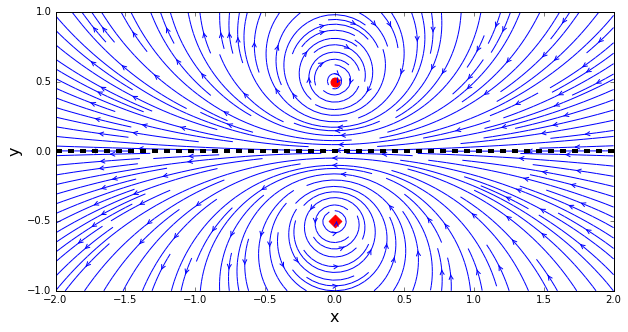

In [9]:
# superposition of the vortex and its image
u1 = vortex.u + vortex_image.u
v1 = vortex.v + vortex_image.v
psi1 = vortex.psi + vortex_image.psi

# plot the streamlines
pyplot.figure(figsize=(size, (yend-ystart)/(xend-xstart)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xstart, xend)
pyplot.ylim(ystart, yend)
pyplot.streamplot(X, Y, u1, v1, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='red', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='red', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

## Motion of a vortex pair near the ground

In [10]:
strength_vortex1 = 1.0
x_vortex1,y_vortex1,x_vortex2,y_vortex2 = 0.1,0.5,-0.1,0.5

#create 2 vortices
vortex1 = Vortex(strength_vortex,x_vortex1,y_vortex1)
vortex2 = Vortex(-strength_vortex,x_vortex2,y_vortex2)

#creating image
vortex_image1 = Vortex(-strength_vortex,x_vortex1,-y_vortex1)
vortex_image2 = Vortex(strength_vortex,x_vortex2,-y_vortex2)

#calculate all velocities and streamfunctions
vortex1.velocity(X,Y)
vortex1.stream_function(X,Y)
vortex2.velocity(X,Y)
vortex2.stream_function(X,Y)
vortex_image1.velocity(X,Y)
vortex_image1.stream_function(X,Y)
vortex_image2.velocity(X,Y)
vortex_image2.stream_function(X,Y)


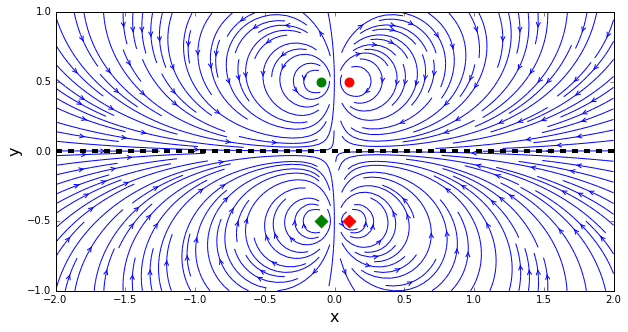

In [11]:
#superposition
u2 = vortex1.u + vortex2.u + vortex_image1.u + vortex_image2.u
v2 = vortex1.v + vortex2.v + vortex_image1.v + vortex_image2.v
psi = vortex1.psi + vortex2.psi + vortex_image1.psi + vortex_image2.psi

#plotting the streamlines
pyplot.figure(figsize=(size, (yend-ystart)/(xend-xstart)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xstart, xend)
pyplot.ylim(ystart, yend)
pyplot.streamplot(X, Y, u2, v2, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='red', s=80, marker='o')
pyplot.scatter(vortex_image1.x, vortex_image1.y, color='red', s=80, marker='D')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex_image2.x, vortex_image2.y, color='green', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

# Doublet near a plane wall parallel to a uniform flow

In [20]:
#freestream
u_inf = 1.0
psi_free = u_inf*Y

In [21]:
class Doublet:
    """
    Contains information pertaining to a doublet
    """
    def __init__(self,strength,x,y):
        """
        Sets the location and strength of the doublet.
        
        Parameters
        ----------
        strength: float
            Strength of the doublet.
        x: float
            x-coordinate of the doublet.
        y: float
            y-coordinate of the doublet.
        """
        self.strength = strength
        self.x = x; self.y = y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = -self.strength/(2*math.pi)*((X-self.x)**2-(Y-self.y)**2)/((X-self.x)**2+(Y-self.y)**2)**2
        self.v = -self.strength/(2*math.pi)*(2*(X-self.x)*(Y-self.y))/((X-self.x)**2+(Y-self.y)**2)**2
        
    def PSI(self, X, Y):
        """
        Computes the stream-function generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = -self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

In [22]:
#doublet
strength_doublet = 1.0
xdoublet,ydoublet = 0.0,0.3

# creating a doublet
doublet = Doublet(strength_doublet, xdoublet, ydoublet)
doublet.velocity(X,Y)
doublet.PSI(X,Y)

#creating image of doublet
doublet_image = Doublet(strength_doublet, xdoublet, -ydoublet)
doublet_image.velocity(X,Y)
doublet_image.PSI(X,Y)

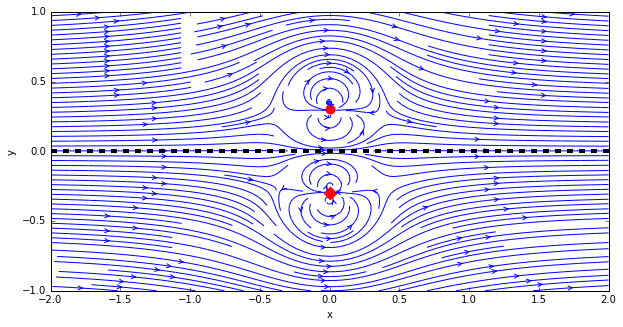

In [23]:
#superposition
u3 = u_inf + doublet.u + doublet_image.u
v3 = doublet.v + doublet_image.v

#plotting
pyplot.figure(figsize=(size,(yend-ystart)/(xend-xstart)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(xstart,xend)
pyplot.ylim(ystart,yend)
pyplot.streamplot(X,Y,u3,v3,density=2,linewidth =1,arrowsize=1,arrowstyle = '->')
pyplot.scatter(xdoublet,ydoublet,color = 'red',marker = 'o',s = 80)
pyplot.scatter(xdoublet,-ydoublet,color = 'red',marker = 'D',s = 80)
pyplot.axhline(0.,color = 'k', linestyle = '--', linewidth = 4)